In [108]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

plt.style.use('default')

In [109]:
listings = pd.read_csv('listings.csv')

listings

/Users/steve/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (87,94,104) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,input.neighborhood_id,input.offset,explore_tabs.sections.listings.listing.bathroom_label,explore_tabs.sections.listings.listing.bathrooms,explore_tabs.sections.listings.listing.bed_label,explore_tabs.sections.listings.listing.bedroom_label,explore_tabs.sections.listings.listing.bedrooms,explore_tabs.sections.listings.listing.beds,explore_tabs.sections.listings.listing.city,explore_tabs.sections.listings.listing.guest_label,...,metadata.marquee_mode,metadata.satori_version,metadata.map_toggle,metadata.price_display_strategy,metadata.satori_config.market,metadata.satori_config.state_code,metadata.satori_config.country_code,metadata.satori_config.region_id,metadata.satori_config.version,metadata.refinement_display_text
0,425,NaN,1 bath,1.0,2 beds,Studio,0.0,2.0,New York,3 guests,...,DEFAULT,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes
1,425,NaN,1 bath,1.0,1 bed,Studio,0.0,1.0,New York,2 guests,...,DEFAULT,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes
2,425,NaN,1 bath,1.0,1 bed,1 bedroom,1.0,1.0,New York,2 guests,...,DEFAULT,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes
3,425,NaN,1 bath,1.0,2 beds,2 bedrooms,2.0,2.0,New York,4 guests,...,DEFAULT,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes
4,425,NaN,2 shared baths,2.0,1 bed,1 bedroom,1.0,1.0,New York,2 guests,...,DEFAULT,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37054,3808,250.0,1 bath,1.0,3 beds,2 bedrooms,2.0,3.0,Staten Island,6 guests,...,DEFAULT,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes
37055,3808,250.0,1 private bath,1.0,1 bed,1 bedroom,1.0,1.0,Staten Island,2 guests,...,DEFAULT,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes
37056,3808,250.0,1 private bath,1.0,2 beds,2 bedrooms,2.0,2.0,Staten Island,4 guests,...,DEFAULT,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes
37057,3808,250.0,1 bath,1.0,4 beds,4 bedrooms,4.0,4.0,Staten Island,8 guests,...,DEFAULT,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes


In [74]:
gdf = gpd.GeoDataFrame(
    listings,
    geometry=gpd.points_from_xy(
        listings['explore_tabs.sections.listings.listing.lng'],
        listings['explore_tabs.sections.listings.listing.lat'],
))

gdf

/Users/steve/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (87,94,104) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,input.neighborhood_id,input.offset,explore_tabs.sections.listings.listing.bathroom_label,explore_tabs.sections.listings.listing.bathrooms,explore_tabs.sections.listings.listing.bed_label,explore_tabs.sections.listings.listing.bedroom_label,explore_tabs.sections.listings.listing.bedrooms,explore_tabs.sections.listings.listing.beds,explore_tabs.sections.listings.listing.city,explore_tabs.sections.listings.listing.guest_label,...,metadata.satori_version,metadata.map_toggle,metadata.price_display_strategy,metadata.satori_config.market,metadata.satori_config.state_code,metadata.satori_config.country_code,metadata.satori_config.region_id,metadata.satori_config.version,metadata.refinement_display_text,geometry
0,425,NaN,1 bath,1.0,2 beds,Studio,0.0,2.0,New York,3 guests,...,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes,POINT (-74.00589 40.70394)
1,425,NaN,1 bath,1.0,1 bed,Studio,0.0,1.0,New York,2 guests,...,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes,POINT (-74.00711 40.70426)
2,425,NaN,1 bath,1.0,1 bed,1 bedroom,1.0,1.0,New York,2 guests,...,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes,POINT (-73.99257 40.71231)
3,425,NaN,1 bath,1.0,2 beds,2 bedrooms,2.0,2.0,New York,4 guests,...,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes,POINT (-73.99740 40.71288)
4,425,NaN,2 shared baths,2.0,1 bed,1 bedroom,1.0,1.0,New York,2 guests,...,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes,POINT (-74.00593 40.70726)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37054,3808,250.0,1 bath,1.0,3 beds,2 bedrooms,2.0,3.0,Staten Island,6 guests,...,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes,POINT (-74.07944 40.64370)
37055,3808,250.0,1 private bath,1.0,1 bed,1 bedroom,1.0,1.0,Staten Island,2 guests,...,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes,POINT (-74.10801 40.62398)
37056,3808,250.0,1 private bath,1.0,2 beds,2 bedrooms,2.0,2.0,Staten Island,4 guests,...,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes,POINT (-74.11777 40.63291)
37057,3808,250.0,1 bath,1.0,4 beds,4 bedrooms,4.0,4.0,Staten Island,8 guests,...,1.0.3,True,CONTROL,New York,NY,US,10,1.0.7,Homes,POINT (-74.07571 40.62356)


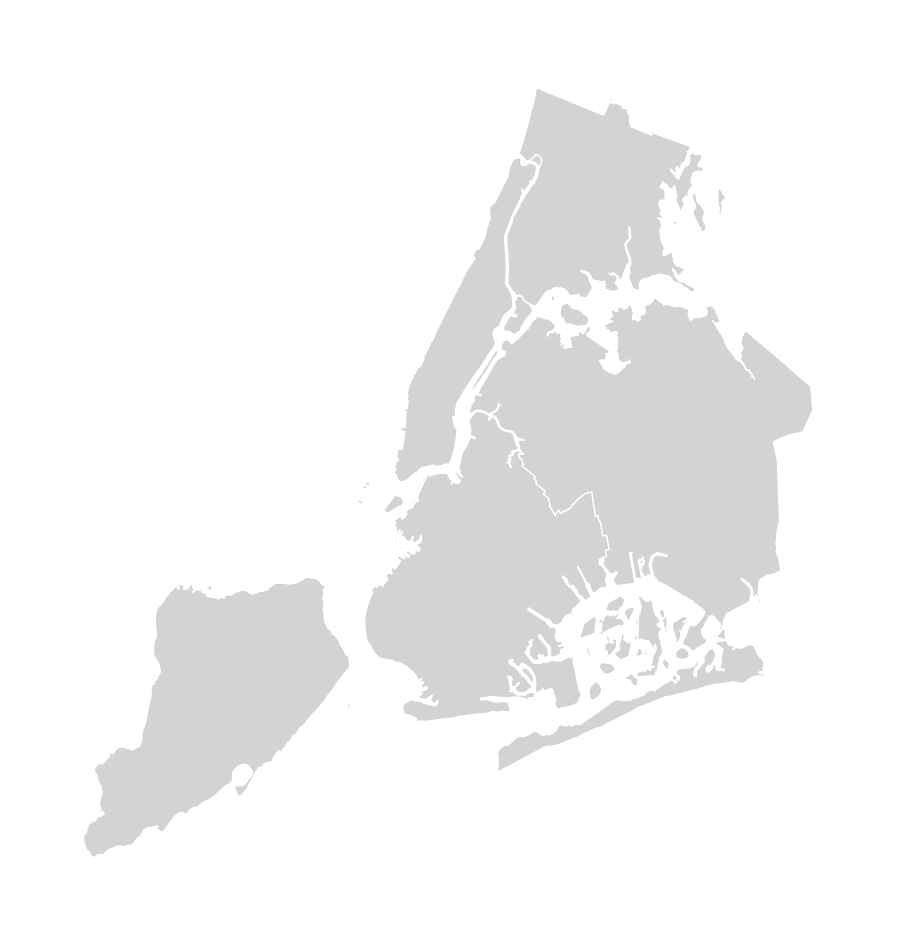

In [104]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))

ax = gplt.polyplot(
    boroughs,
    zorder=-1,
    linewidth=1,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 12)
)

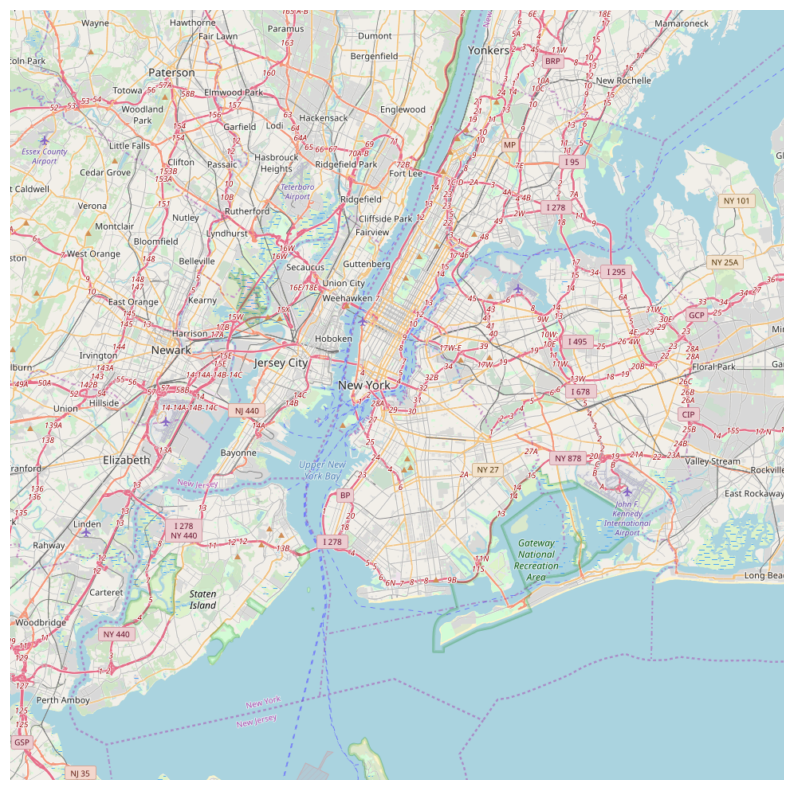

In [96]:
ax = gplt.webmap(boroughs, projection=gcrs.WebMercator(), figsize=(10, 10))

In [105]:
# https://residentmario.github.io/geoplot/gallery/plot_usa_city_elevations.html
def power_scale(minval, maxval):
    def scalar(val):
        val = val + abs(minval) + 1
        return (val / 100) ** 2
    return scalar

gplt.pointplot(
    gdf,
    projection=gcrs.WebMercator(),
    hue='explore_tabs.sections.listings.pricing_quote.rate.amount',
    scale='explore_tabs.sections.listings.listing.reviews_count',
    scale_func=power_scale,
    k=8,
    cmap='inferno_r',
    legend=True,
    ax=ax
)

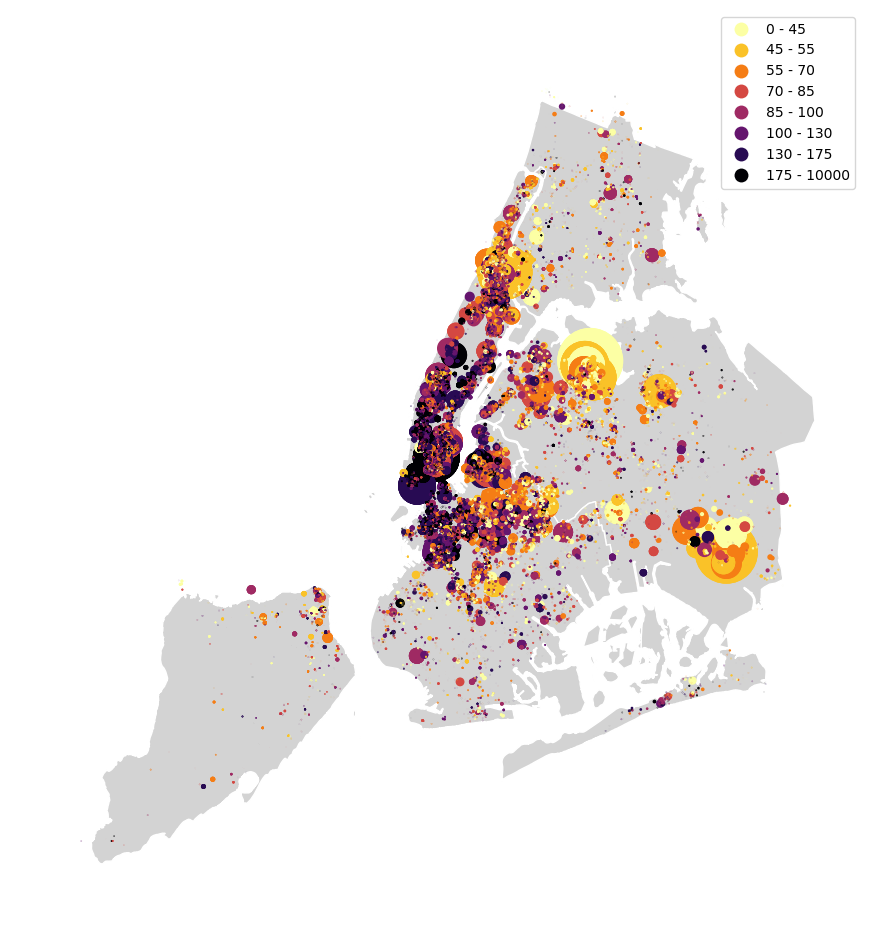

In [106]:
ax.figure